In [4]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

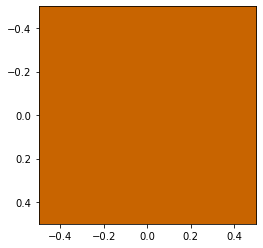

In [12]:
import matplotlib.pyplot as plt
pixel: tuple = (200, 100, 0)
plt.imshow([[list(pixel)]])

In [16]:
# Get the minimum dimensions for cropping
from os import listdir
from os.path import isfile, join

min_height = 100000000
min_width = 100000000
min_width_filename = ""
min_height_filename = ""

mypath = "/Users/alexp/dev/personal/doppelganger/training_sets/extended/set"

for f in listdir(mypath):
    im = Image.open(join(mypath, f))
    if im.size[0] < min_width:
        min_width = im.size[0]
        min_width_filename = f
    if im.size[1] < min_height:
        min_height = im.size[1]
        min_height_filename = f

print(min_height_filename)
print(min_height)
print(min_width_filename)
print(min_width)

Mutation_80_39.jpg
534
Mutation_10_32.jpg
495


In [20]:
# Crop the images and store the modified images!
# box = (0, 0, min_width, min_height)
from os import listdir
from os.path import isfile, join
from PIL import Image
import re

mypath = "/Users/alexp/dev/personal/doppelganger/training_sets/extended/set"
originals_path = "/Users/alexp/dev/personal/doppelganger/training_sets/extended/data/originals"
mutations_path = "/Users/alexp/dev/personal/doppelganger/training_sets/extended/data/mutations"


for f in listdir(mypath):
    im = Image.open(join(mypath, f))
    if re.search('Mutation', f) is None:
        im.save(join(originals_path, f))
    else:
        im.save(join(mutations_path, f))


In [ ]:
# Now to the model!

In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow import convert_to_tensor
from PIL import Image

In [3]:
import tensorflow as tf

print(tf.version.VERSION)

2.0.0


In [9]:
# Load modified images into memory!
from os import listdir
from os.path import isfile, join
import re
import random

modified_path = "/Users/alexp/dev/personal/doppelganger/training_sets/extended/modified"
image_data = { 'Test': [], 'Train': [] }
count = 0
for f in listdir(modified_path):
    # Label Encoding:
    # {
    #   [0, 1]: Mutation,
    #   [1, 0]: Original
    # }
    label = [1, 0] if re.search('%Mutation%', f) is None else [0, 1]
    
    # Bucket N% of images into training set vs test set
    cohort = 'Train' if random.uniform(0, 1) < 0.7 else 'Test'

    image_data[cohort].append({
        'image': img_to_array(Image.open(join(modified_path, f))).astype(int),
        'label': label
    })
print(len(image_data['Train']))
print(len(image_data['Test']))

436
167


In [10]:
from tensorflow import convert_to_tensor
from operator import itemgetter
print("hello")
train_data = convert_to_tensor(list(map(itemgetter('image'), image_data['Train'])))
train_labels = convert_to_tensor(list(map(itemgetter('label'), image_data['Train'])))
print("Training is done!")
test_data = convert_to_tensor(list(map(itemgetter('image'), image_data['Test'])))
test_labels = convert_to_tensor(list(map(itemgetter('label'), image_data['Test'])))
print("Test data is done!")

print(len(train_data))
print(len(train_labels))
print(len(test_data))
print(len(test_labels))

hello
Training is done!
Test data is done!
436
436
167
167


In [13]:
print(train_data[0].shape)
print(train_labels[0])

(534, 495, 3)
tf.Tensor([1 0], shape=(2,), dtype=int32)


In [ ]:
# Load modified images into memory!
from os import listdir
from os.path import isfile, join
import re
import random

data_path = "/Users/alexp/dev/personal/doppelganger/training_sets/extended/set"
count = 0
for f in listdir(data_path):
    label = [1, 0] if re.search('%Mutation%', f) is None else [0, 1]
    
    # Bucket N% of images into training set vs test set
    cohort = 'Train' if random.uniform(0, 1) < 0.7 else 'Test'

    image_data[cohort].append({
        'image': img_to_array(Image.open(join(modified_path, f))).astype(int),
        'label': label
    })
print(len(image_data['Train']))
print(len(image_data['Test']))

In [16]:
# Use keras data generators
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = '../training_sets/extended/data'
target_size = (534,495)
classes = ('originals', 'mutations')
class_mode = 'binary'
interpolation = 'bicubic'

generator = ImageDataGenerator(validation_split=0.2)
train_generator = generator.flow_from_directory(
    directory= data_dir,
    target_size= target_size,
    classes= classes,
    class_mode= class_mode,
    subset='training',
    interpolation= interpolation,
    save_to_dir='../training_sets/extended/augmented/train'
)

validation_generator = generator.flow_from_directory(
    directory=data_dir,
    target_size=target_size,
    classes=classes,
    class_mode=class_mode,
    subset='validation',
    interpolation= interpolation,
    save_to_dir='../training_sets/extended/augmented/test'
)

Found 483 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [2]:
print(validation_generator[0])

FileNotFoundError: [Errno 2] No such file or directory: '../training_sets/extended/augmented/test/_17_7408159.png'

In [17]:
# Define the model!
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(534,495,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 532, 493, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 266, 246, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 264, 244, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 132, 122, 64)      0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1030656)           0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                65962048  
_________________________________________________________________
dense_3 (Dense)              (None, 2)                

In [18]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [19]:
history = model.fit_generator(
          train_generator,
          steps_per_epoch=10,
          epochs=15,
          validation_data=validation_generator,
          validation_steps=100)
model.save_weights('first_try.h5')

Epoch 1/15
10/10 [==============================] - 86s 9s/step - loss: 7.7015 - accuracy: 0.8750 - val_loss: 7.7022 - val_accuracy: 0.8833
Epoch 2/15
10/10 [==============================] - 55s 6s/step - loss: 7.7004 - accuracy: 0.8625
Epoch 3/15
10/10 [==============================] - 63s 6s/step - loss: 7.7012 - accuracy: 0.8719
Epoch 4/15
10/10 [==============================] - 55s 6s/step - loss: 7.7019 - accuracy: 0.8797
Epoch 5/15
10/10 [==============================] - 55s 6s/step - loss: 7.7022 - accuracy: 0.8832
Epoch 6/15
10/10 [==============================] - 64s 6s/step - loss: 7.7001 - accuracy: 0.8594
Epoch 7/15
10/10 [==============================] - 59s 6s/step - loss: 7.7007 - accuracy: 0.8656
Epoch 8/15
10/10 [==============================] - 64s 6s/step - loss: 7.7026 - accuracy: 0.8875
Epoch 9/15
10/10 [==============================] - 60s 6s/step - loss: 7.7019 - accuracy: 0.8797
Epoch 10/15
10/10 [==============================] - 61s 6s/step - loss: 7.7

In [20]:
score = model.evaluate(validation_generator, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 7.7022247314453125
Test accuracy: 0.8833333253860474
